## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe your approach.



Your Name : Yasemin Alpay

In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


In [2]:
BaseYear = 1966
degree = 3

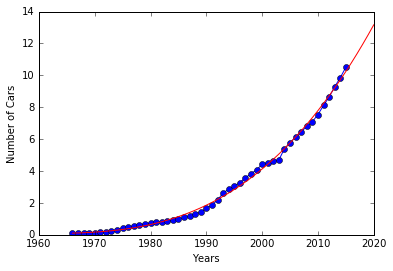

matrix([[ 10.79112709],
        [ 11.35645675],
        [ 11.9412923 ],
        [ 12.54596358],
        [ 13.17080038]])

In [3]:
#CARS
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Cars')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls


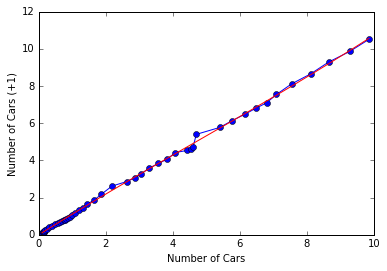

[[ 11.3311088]]
[[ 12.33226536]]
[[ 13.60910798]]
[[ 15.34267934]]
[[ 17.91718634]]


In [4]:
#CARS AR MODEL
x = np.matrix(df_arac.Car[0:-1]).T/1000000.0
y = np.matrix(df_arac.Car[1:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Cars')
plt.ylabel('Number of Cars (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.Car[-1:]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls


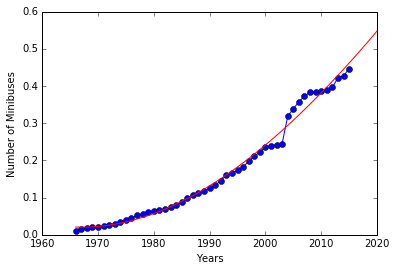

matrix([[ 0.47834616],
        [ 0.49531001],
        [ 0.51249898],
        [ 0.52990841],
        [ 0.54753359]])

In [5]:
#MINIBUS
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Minibus[0:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Minibuses')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

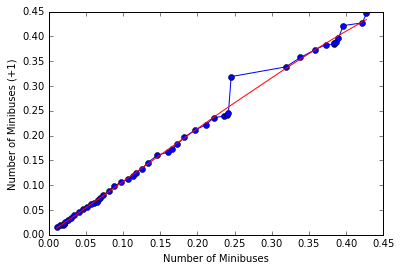

[[ 0.44983509]]
[[ 0.45223335]]
[[ 0.45413095]]
[[ 0.45562529]]
[[ 0.45679759]]


In [6]:
#MINIBUS AR MODEL
x = np.matrix(df_arac.Minibus[0:-1]).T/1000000.0
y = np.matrix(df_arac.Minibus[1:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Minibuses')
plt.ylabel('Number of Minibuses (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.Minibus[-1:]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls


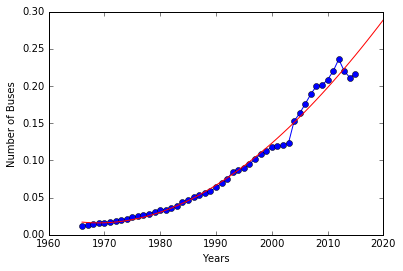

matrix([[ 0.25068475],
        [ 0.26003013],
        [ 0.26952579],
        [ 0.27916984],
        [ 0.28896037]])

In [7]:
#BUS
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Bus[0:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Buses')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

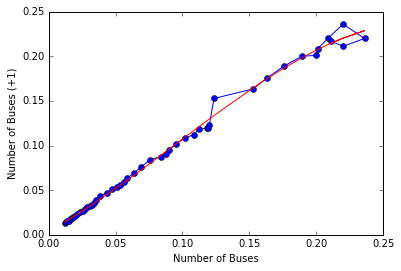

[[ 0.21828472]]
[[ 0.21933873]]
[[ 0.21997276]]
[[ 0.22034958]]
[[ 0.22057191]]


In [8]:
#BUS AR MODEL
x = np.matrix(df_arac.Bus[0:-1]).T/1000000.0
y = np.matrix(df_arac.Bus[1:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Buses')
plt.ylabel('Number of Buses (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.Bus[-1:]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls

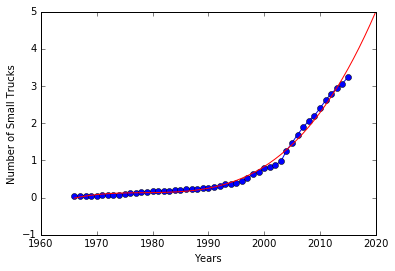

matrix([[ 3.7323536 ],
        [ 4.02457924],
        [ 4.33228249],
        [ 4.65586466],
        [ 4.99572705]])

In [9]:
#SMALLTRUCK
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SmallTruck[0:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Small Trucks')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

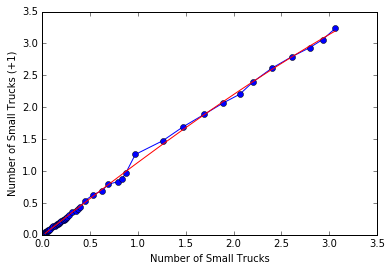

[[ 3.34072339]]
[[ 3.42719908]]
[[ 3.49669642]]
[[ 3.55159097]]
[[ 3.59433842]]


In [10]:
#SMALL TRUCK AR MODEL
x = np.matrix(df_arac.SmallTruck[0:-1]).T/1000000.0
y = np.matrix(df_arac.SmallTruck[1:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Small Trucks')
plt.ylabel('Number of Small Trucks (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.SmallTruck[-1:]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls

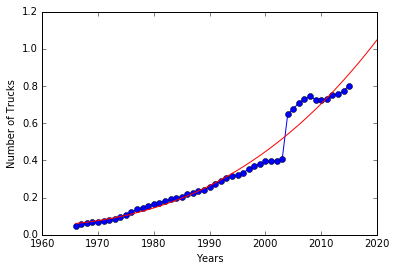

matrix([[ 0.89955409],
        [ 0.93521928],
        [ 0.9718232 ],
        [ 1.00937726],
        [ 1.04789288]])

In [11]:
#TRUCK
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Truck[0:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Trucks')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

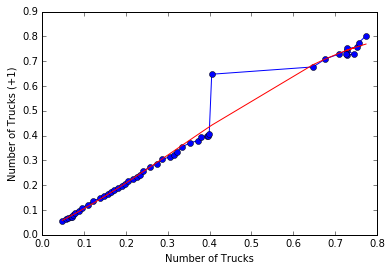

[[ 0.78186427]]
[[ 0.7730241]]
[[ 0.76884913]]
[[ 0.7667946]]
[[ 0.76576425]]


In [12]:
#TRUCK AR MODEL
x = np.matrix(df_arac.Truck[0:-1]).T/1000000.0
y = np.matrix(df_arac.Truck[1:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Trucks')
plt.ylabel('Number of Trucks (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.Truck[-1:]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls

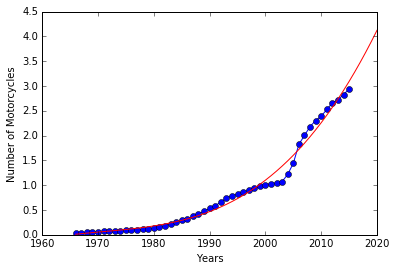

matrix([[ 3.281573  ],
        [ 3.47931129],
        [ 3.68536275],
        [ 3.89990762],
        [ 4.12312614]])

In [13]:
#MOTORCYCLE
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Motorcycle[0:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Motorcycles')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

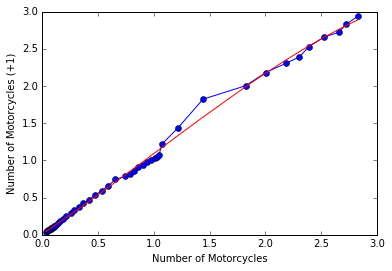

[[ 2.96432807]]
[[ 2.98094379]]
[[ 2.99159855]]
[[ 2.99836009]]
[[ 3.00262213]]


In [14]:
#MOTORCYCLE AR MODEL
x = np.matrix(df_arac.Motorcycle[0:-1]).T/1000000.0
y = np.matrix(df_arac.Motorcycle[1:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Motorcycles')
plt.ylabel('Number of Motorcycles (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.Motorcycle[-1:]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls

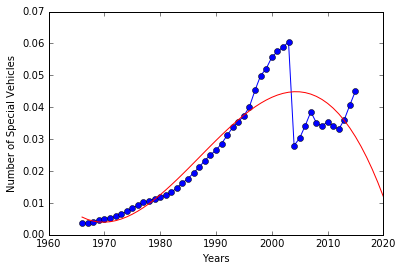

matrix([[ 0.02771546],
        [ 0.02432523],
        [ 0.02057774],
        [ 0.01646104],
        [ 0.01196321]])

In [15]:
#SPECIAL VEHICLES
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SpecialVehicles[0:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Special Vehicles')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

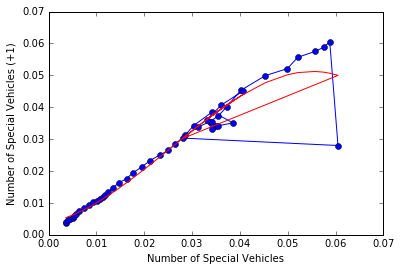

[[ 0.0475749]]
[[ 0.04907496]]
[[ 0.04982041]]
[[ 0.0501368]]
[[ 0.05025985]]


In [16]:
#SPECIAL VEHICLES AR MODEL
x = np.matrix(df_arac.SpecialVehicles[0:-1]).T/1000000.0
y = np.matrix(df_arac.SpecialVehicles[1:]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Special Vehicles')
plt.ylabel('Number of Special Vehicles (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.SpecialVehicles[-1:]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls

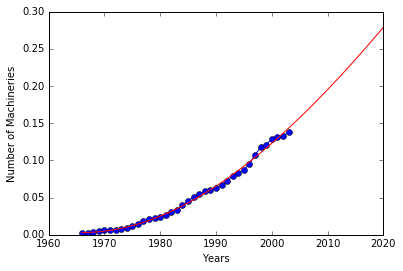

matrix([[ 0.24421742],
        [ 0.25276353],
        [ 0.26140719],
        [ 0.27014561],
        [ 0.27897601]])

In [21]:
#MACHINERIES
x = np.matrix(df_arac.Year[0:38]).T-BaseYear
y = np.matrix(df_arac.Machinery[0:38]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
#w_ls = (A.T*A).I*A.T*y

TargetYear = np.arange(BaseYear,2021)
x_test = np.matrix(TargetYear).T - BaseYear
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Machineries')
plt.plot(x_test+BaseYear, f, 'r-')
plt.show()

TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020])
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

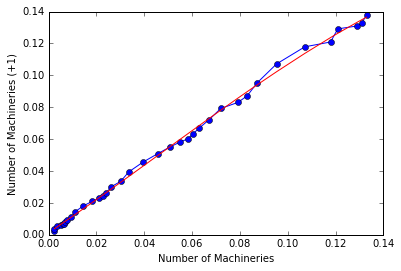

[[ 0.14045086]]
[[ 0.14237341]]
[[ 0.14381128]]
[[ 0.14486926]]
[[ 0.14563806]]


In [23]:
#MACHINERY AR MODEL
x = np.matrix(df_arac.Machinery[0:37]).T/1000000.0
y = np.matrix(df_arac.Machinery[1:38]).T/1000000.0

A = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls

plt.plot(x, y, 'o-')
plt.xlabel('Number of Machineries')
plt.ylabel('Number of Machineries (+1)')
plt.plot(x, f, 'r-')
plt.show()

x_test = np.matrix(df_arac.Machinery[37]/1000000)
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))
print A2*w_ls


for i in range (4):
    A2 = np.hstack((np.power(A2*w_ls,i) for i in range(degree+1)))
    print A2*w_ls